# Credit Risk Probability Model for Alternative Data

## Task 2 - Exploratory Data Analysis (EDA)

## Overview of the Data

In [1]:
import pandas as pd
import numpy as np

# Load main dataset
df = pd.read_csv('../data/raw/data.csv')

# Load variable definitions
var_defs = pd.read_csv('../data/raw/Xente_Variable_Definitions.csv')

# Overview of the Data
print("Shape:", df.shape)  # Number of rows and columns
print("Columns:", df.columns.tolist())  # List of columns
print(df.info())  # Data types and non-null counts

Shape: (95662, 16)
Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  Chann

The dataset contains **95,662 transactions** across **16 columns**. The columns include unique identifiers, transaction details, and customer-related information.

### Data Types and Missing Values

In [2]:
# Explore data types and missing values
df.info()
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

print(f"Duplicate rows: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## Summary Statistics

In [3]:
# Summary Statistics
display(df.describe(include='all'))

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94556,NaN,NaN
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,NaN,2.255974,0.002018
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.233068e+05,1.231221e+05,NaN,0.732924,0.044872
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,NaN,2.000000,0.000000


FraudResult
0    95469
1      193
Name: count, dtype: int64
Fraud rate: 0.0020


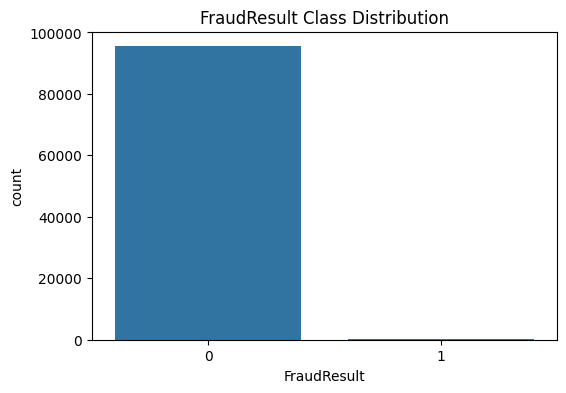

In [14]:
# Check class distribution
fraud_counts = df['FraudResult'].value_counts()
print(fraud_counts)
print(f"Fraud rate: {fraud_counts[1] / fraud_counts.sum():.4f}")

# Visualize imbalance
plt.figure(figsize=(6,4))
sns.countplot(x='FraudResult', data=df)
plt.title('FraudResult Class Distribution')
plt.show()


### Summary Statistics Insights

Transaction Count: The dataset contains 95,662 transactions, each with a unique TransactionId.

Categorical Variables:

AccountId: 3,633 unique accounts, indicating diverse customers.
CurrencyCode: All transactions are in UGX, simplifying currency considerations.
Transaction Amounts:

Mean transaction amount is 6,717.85 with high variability (std. dev. = 123,306.8).
Extreme values include a min of -1,000,000 (potential refunds) and a max of 9,880,000.
Target Variable Imbalance: FraudResult has a mean of 0.002, indicating only 0.2% of transactions are fraudulent, which may impact model performance.

Data Quality Concerns: The extreme values in Amount and Value suggest the need for further investigation.


## Distribution of Numerical Features

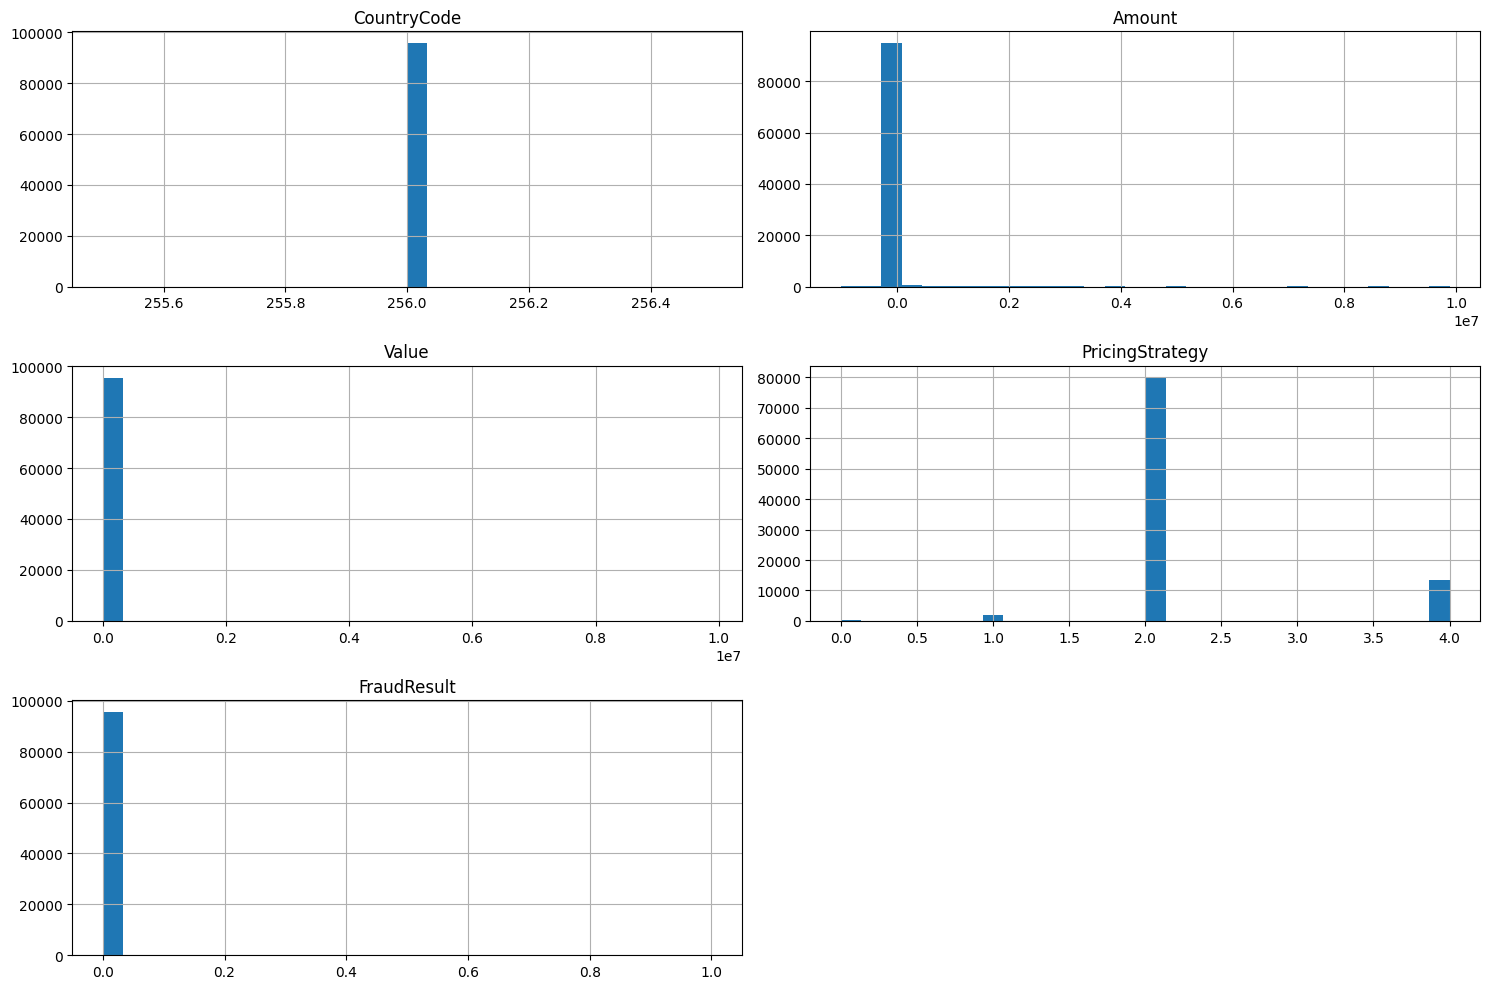

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

# Distribution of Numerical Features
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()  
plt.show()

## Distribution of Categorical Features

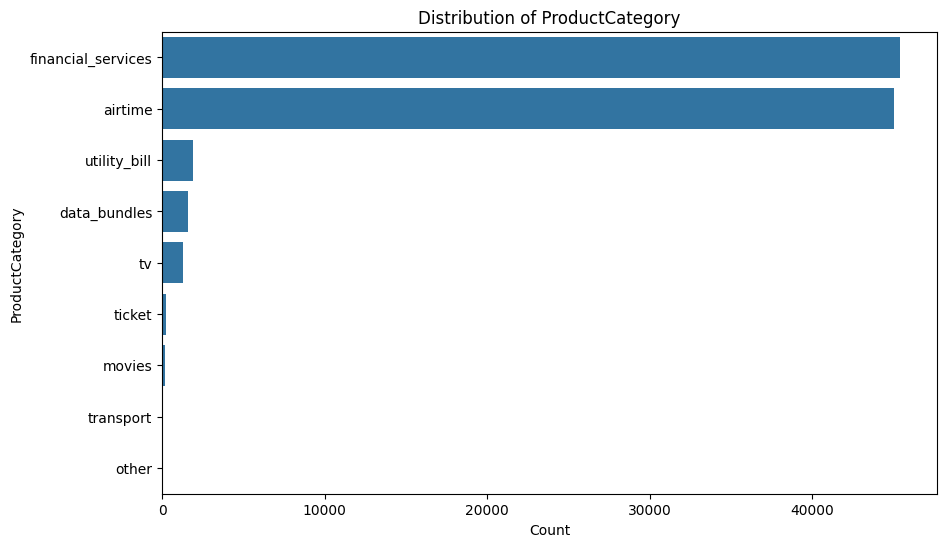

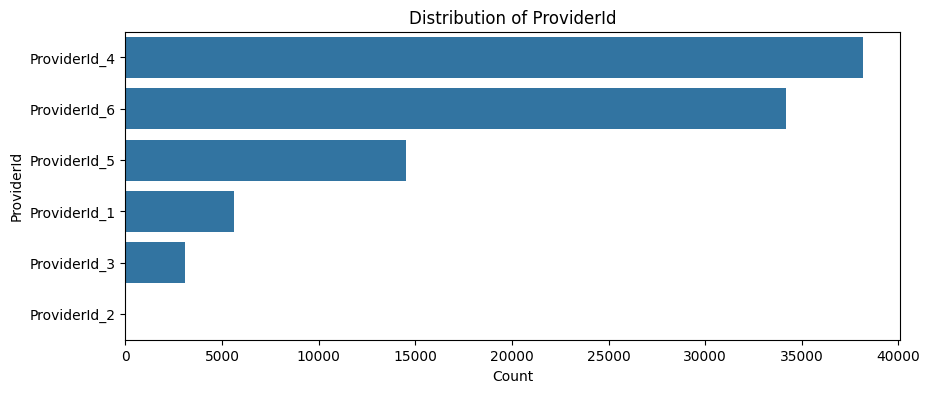

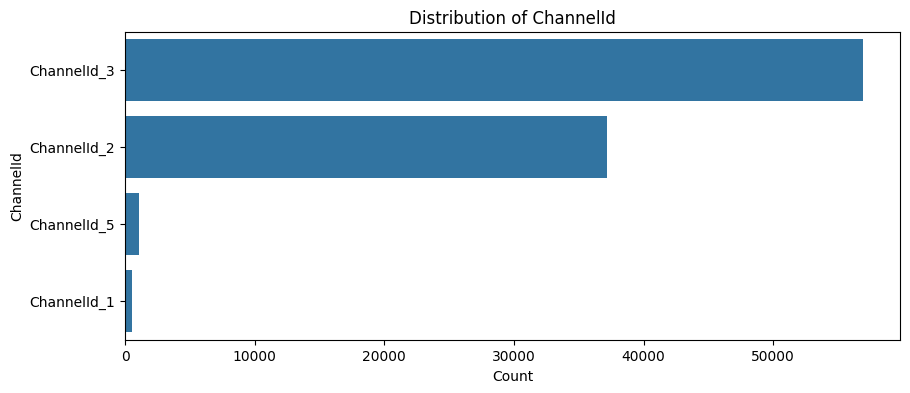

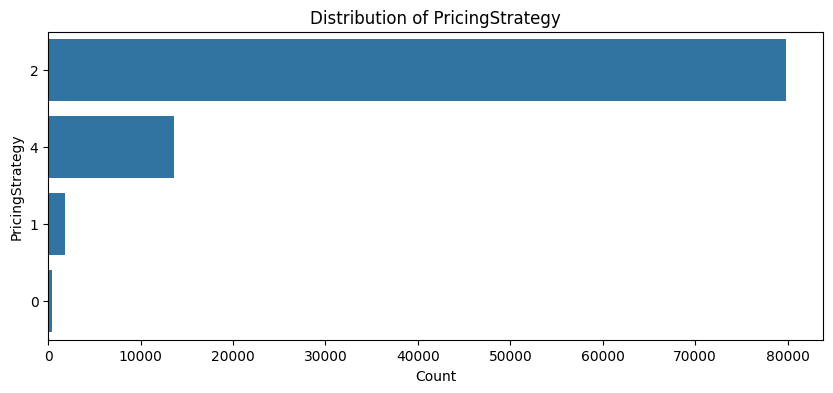

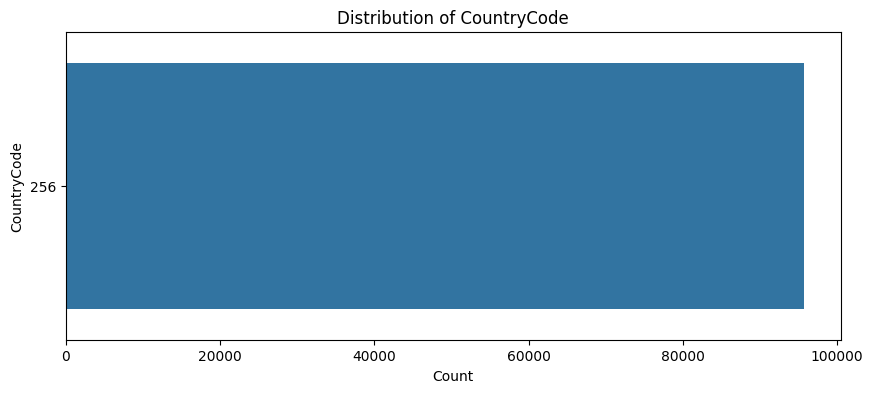

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of ProductCategory
plt.figure(figsize=(10, 6))
sns.countplot(y=df['ProductCategory'], order=df['ProductCategory'].value_counts().index)
plt.title('Distribution of ProductCategory')
plt.xlabel('Count')
plt.ylabel('ProductCategory')
plt.show()

# Repeat for other categorical columns as needed
categorical_cols = ['ProviderId', 'ChannelId', 'PricingStrategy', 'CountryCode']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

## Correlation Analysis

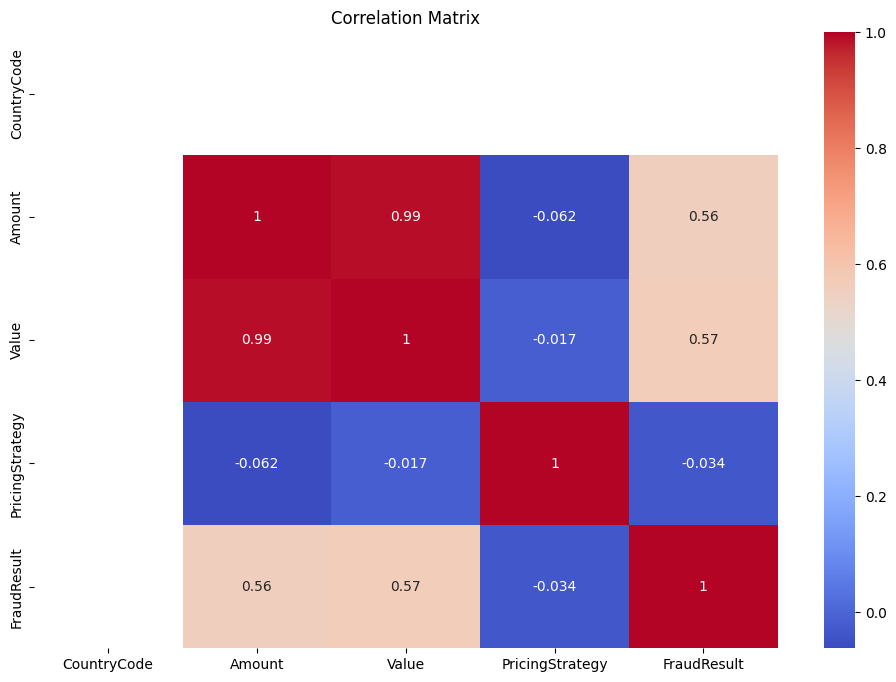

In [16]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Identifying Missing Values

In [17]:
# Identifying Missing Values
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing values:\n", missing)

Missing values:
 Series([], dtype: int64)


### Insights on Missing Values

No Missing Values: The output indicates that there are no missing values in the dataset. This is a positive sign, as it means all records are complete and can be used for analysis without the need for imputation or handling missing data.

## Outlier Detection

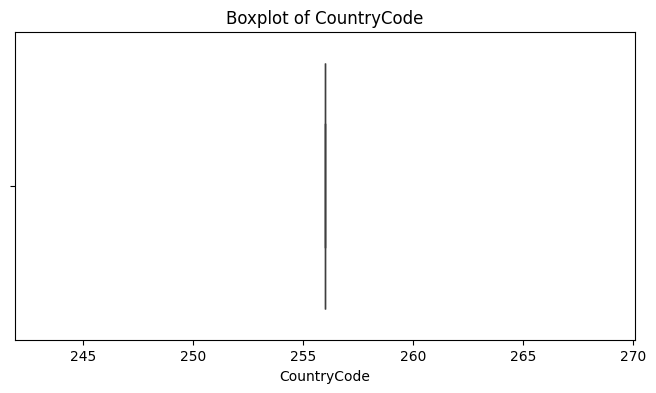

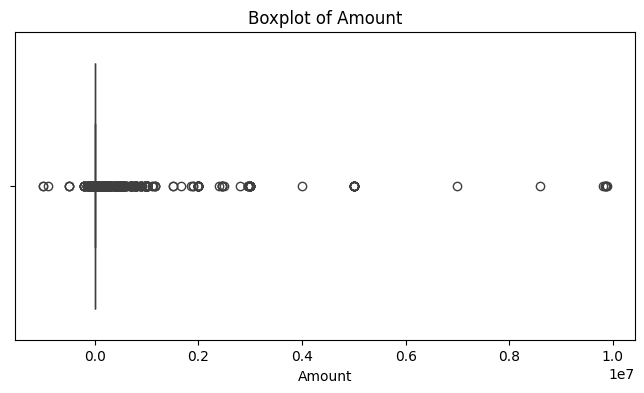

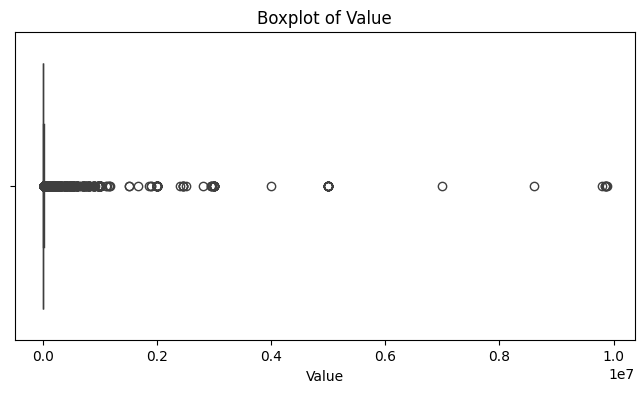

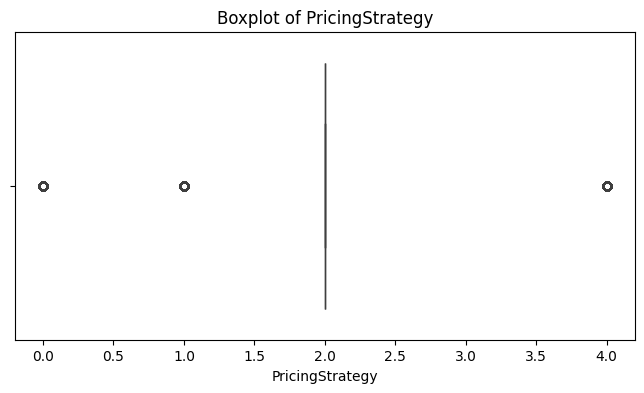

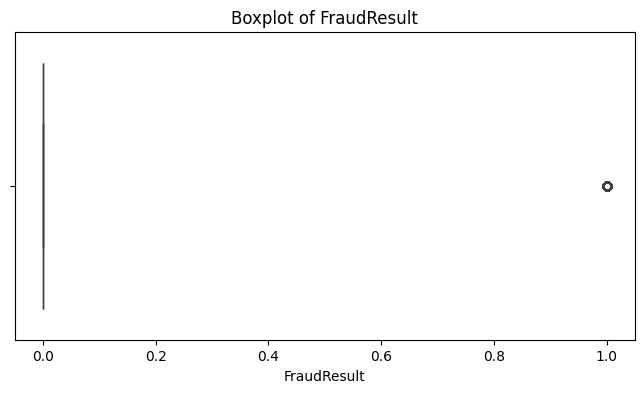

In [18]:
# Outlier Detection (Boxplots)
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Insights for Class Distribution of FraudResult

Class Imbalance: The FraudResult variable shows a significant imbalance, with 95,469 non-fraudulent transactions (0) compared to only 193 fraudulent transactions (1). This results in a fraud rate of 0.2%.

Potential Challenges for Modeling: The extreme class imbalance may affect the performance of predictive models, as most algorithms assume a balanced dataset.


## Top N Categories for Categorical Features

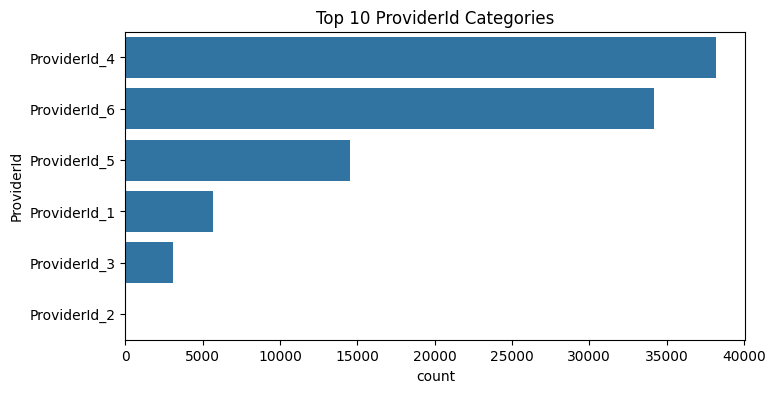

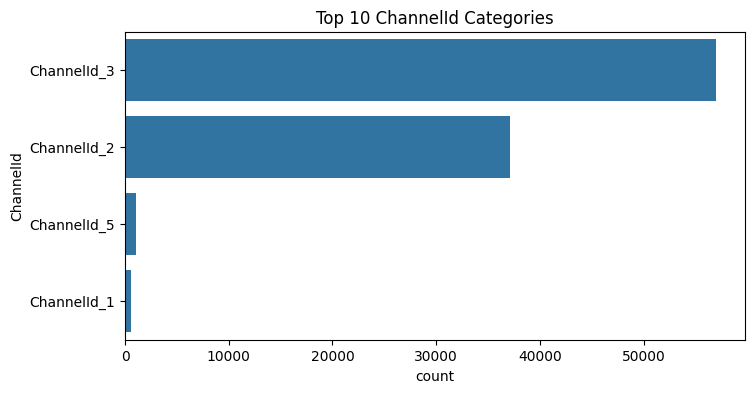

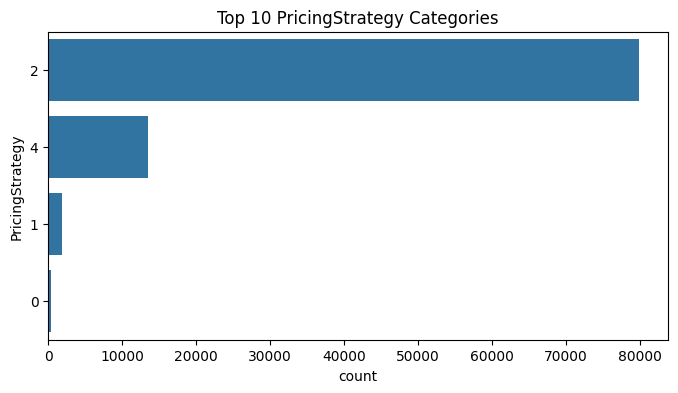

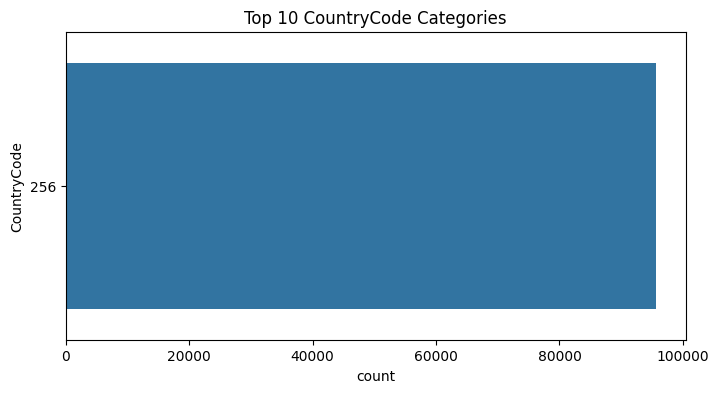

In [19]:
TOP_N = 10
MAX_UNIQUE = 50

for col in categorical_cols:  
    nunique = df[col].nunique()
    if nunique > MAX_UNIQUE:
        print(f"Skipping {col} (too many unique values: {nunique})")
        continue
    plt.figure(figsize=(8, 4))
    top_categories = df[col].value_counts().nlargest(TOP_N).index
    sns.countplot(y=df[col], order=top_categories, data=df[df[col].isin(top_categories)])
    plt.title(f'Top {TOP_N} {col} Categories')
    plt.show()